In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#nombre de lignes et de colognes
df.shape

(20640, 10)

In [4]:
#les colums et leur type
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
#Chercher les valeurs manquantes dans le dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#occurences des valeurs
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#1.2-4
#afficher des statistiques
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

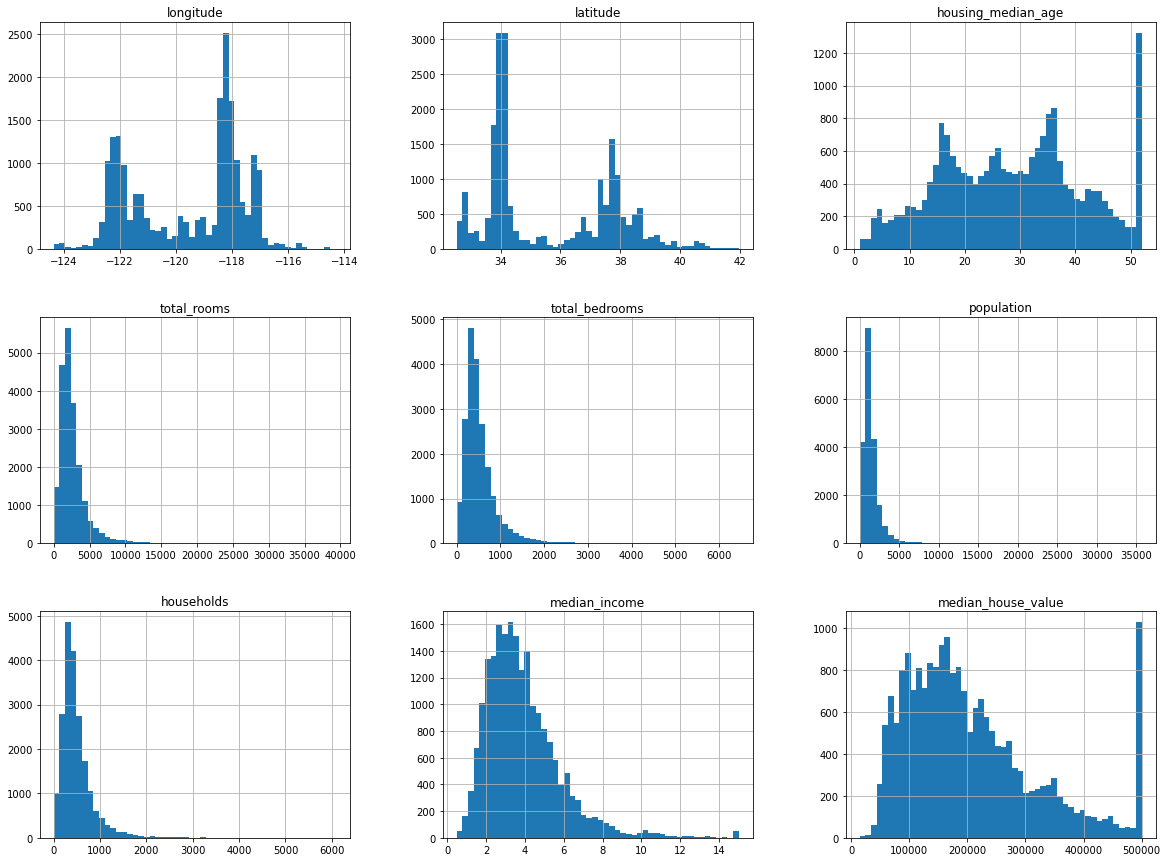

In [8]:
#Créez un code qui affiche les histogrammes des différents attributs.
df.hist(bins=50, figsize=(20,15))

In [9]:
#1.3-1
#Créez un code qui partitionne les données en base d’apprentissage et base de test.
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [10]:
#1.3-2
#afficher l’en-tête de la base de test
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


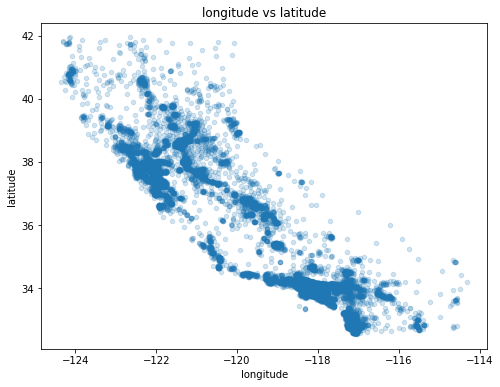

In [11]:
#1.4-1
#Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude.

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(8,6))
plt.title('longitude vs latitude')
plt.show()

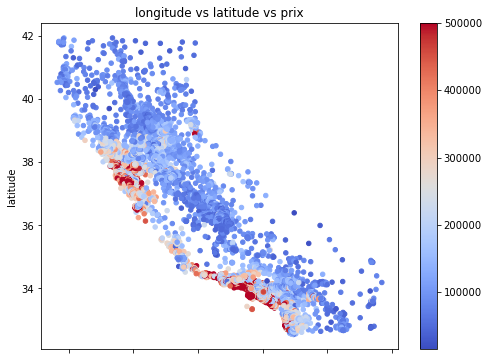

In [12]:
#1.4-2
#Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons
df.plot(kind="scatter", x="longitude", y="latitude", c=df['median_house_value'], figsize=(8,6), sharex='false',colormap='coolwarm')
plt.title('longitude vs latitude vs prix')
plt.show()



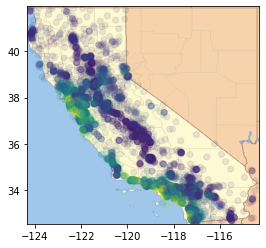

In [13]:
#1.4-3
#Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons.
import matplotlib.image as mpimg

img = mpimg.imread('california.png')

fig, ax = plt.subplots()
ax.imshow(img, extent=[-124.35, -114.31, 32.54, 41.95])
ax.scatter(x_train['longitude'],x_train['latitude'], c=y_train, alpha=0.1)

In [14]:
#1.4-4
#Créez un code qui affiche, en valeur, la corrélation de l’attribut "median_house_value" avec les autres attributs.

df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [15]:
#1.5-1
#Créez un code permettant de créer deux variables :

feature = df.drop(['median_house_value'], axis=1)
print(feature)
target = df['median_house_value'].copy()
target

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [16]:
# 1.5-2
#Ecrivez un code qui remplace les valeurs manquantes par la médiane.

feature.fillna(feature['total_bedrooms'].mean(), inplace = True)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [17]:
#1.5-3
#afficher les 10 premières lignes de ocean_proximity

feature['ocean_proximity'].head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [27]:
#Transformer les valeurs qualitatives en des valeurs numériques pour ocean_proximity
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

ocean_prox_num = feature.iloc[:, 8]
ocean_prox_num = encoder.fit_transform(ocean_prox_num)
ocean_prox_num.reshape(-1,1)
feature.iloc[:,8] = ocean_prox_num

In [28]:
feature

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,13762
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,13761
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,13760
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,13759
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,6875
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6874
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,6873
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,20316
